# Packages

In [3]:
import pandas as pd
import pandas as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess

# Seasonal Data

In [4]:
s_df = pd.read_csv('BirthMonthsData.csv',sep=',')

In [5]:
s_df.shape

(53409, 7)

In [6]:
s_df.head()

,Country or Area,Year,Area,Month,Record Type,Reliability,Number_of_Births
0,Åland Islands,2019,Total,Total,Data tabulated by year of occurrence,"Final figure, complete",267.0
1,Åland Islands,2019,Total,January,Data tabulated by year of occurrence,"Final figure, complete",28.0
2,Åland Islands,2019,Total,February,Data tabulated by year of occurrence,"Final figure, complete",24.0
3,Åland Islands,2019,Total,March,Data tabulated by year of occurrence,"Final figure, complete",26.0
4,Åland Islands,2019,Total,April,Data tabulated by year of occurrence,"Final figure, complete",16.0


#### summary statistics

In [7]:
s_df.describe()

,Year,Number_of_Births
count,53409.000000,5.340900e+04
mean,1996.884982,3.889705e+04
std,14.153271,1.768072e+05
min,1967.000000,0.000000e+00
25%,1985.000000,4.970000e+02
50%,1998.000000,5.244000e+03
75%,2009.000000,2.092300e+04
max,2021.000000,4.265555e+06


In [8]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53409 entries, 0 to 53408
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country or Area   53409 non-null  object 
 1   Year              53409 non-null  int64  
 2   Area              53409 non-null  object 
 3   Month             53409 non-null  object 
 4   Record Type       53409 non-null  object 
 5   Reliability       53409 non-null  object 
 6   Number_of_Births  53409 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ MB


In [9]:
s_df.isnull().sum()

Country or Area     0
Year                0
Area                0
Month               0
Record Type         0
Reliability         0
Number_of_Births    0
dtype: int64

array([[<Axes: title={'center': 'Year'}>,
        <Axes: title={'center': 'Number_of_Births'}>]], dtype=object)

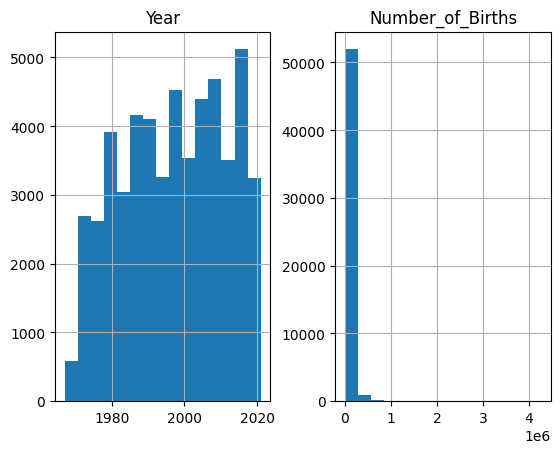

In [10]:
s_df.hist(bins=15)

In [11]:
gs_df = s_df.groupby('Year')

In [12]:
gs_df.head()

,Country or Area,Year,Area,Month,Record Type,Reliability,Number_of_Births
0,Åland Islands,2019,Total,Total,Data tabulated by year of occurrence,"Final figure, complete",267.0
1,Åland Islands,2019,Total,January,Data tabulated by year of occurrence,"Final figure, complete",28.0
2,Åland Islands,2019,Total,February,Data tabulated by year of occurrence,"Final figure, complete",24.0
3,Åland Islands,2019,Total,March,Data tabulated by year of occurrence,"Final figure, complete",26.0
4,Åland Islands,2019,Total,April,Data tabulated by year of occurrence,"Final figure, complete",16.0
...,...,...,...,...,...,...,...
9100,Chile,1967,Total,February,Data tabulated by year of occurrence,"Final figure, complete",19480.0
9101,Chile,1967,Total,March,Data tabulated by year of occurrence,"Final figure, complete",20671.0
9102,Chile,1967,Total,April,Data tabulated by year of occurrence,"Final figure, complete",19172.0
9722,"China, Macao SAR",2021,Total,January,Data tabulated by year of occurrence,Provisional figure,399.0


In [13]:
sub_s_df = gs_df['Number_of_Births'].sum().reset_index()

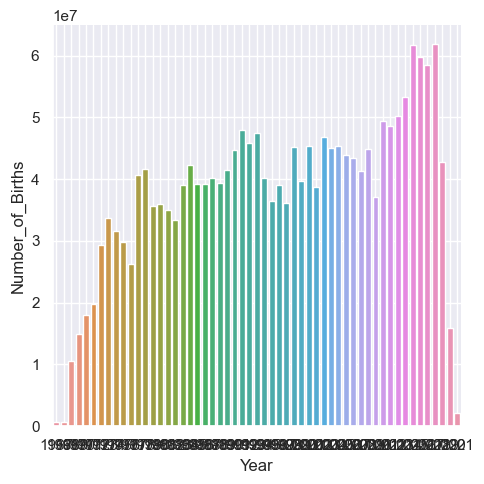

In [14]:
sns.set(rc={"figure.figsize":(18, 4)})
sns.catplot(x='Year',y='Number_of_Births',kind='bar',data=sub_s_df)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.grid(True)


In [15]:
s_df.columns

Index(['Country or Area', 'Year', 'Area', 'Month', 'Record Type',
       'Reliability', 'Number_of_Births'],
      dtype='object')

In [25]:
s_df['Year'].value_counts()

2018    1477
2017    1361
2007    1289
2016    1282
2014    1241
2015    1238
1999    1230
2013    1223
2001    1189
2002    1177
2000    1175
2009    1172
2004    1164
2019    1148
2011    1145
1995    1145
2003    1144
1997    1139
2012    1136
2008    1122
1994    1105
1992    1104
2010    1101
1985    1096
1996    1086
1998    1069
2005    1064
1986    1044
1990    1040
1984    1031
1988    1019
1982    1019
2006    1019
1993    1013
1991    1012
1981    1006
1980    1006
1987    1001
1983     993
1978     957
1989     954
1979     947
1974     928
1975     901
1973     882
1976     876
1977     844
2020     532
1971     461
1972     425
1970     278
1969     161
2021      95
1968      78
1967      65
Name: Year, dtype: int64

In [30]:
val = s_df.groupby('Year')['Number_of_Births'].mean()
print(val.head())
len(val)

Year
1967    10988.892308
1968     9072.256410
1969    65780.018634
1970    53555.737410
1971    39048.045553
Name: Number_of_Births, dtype: float64


55

In [31]:
s_df['Date']

KeyError: 'Date'

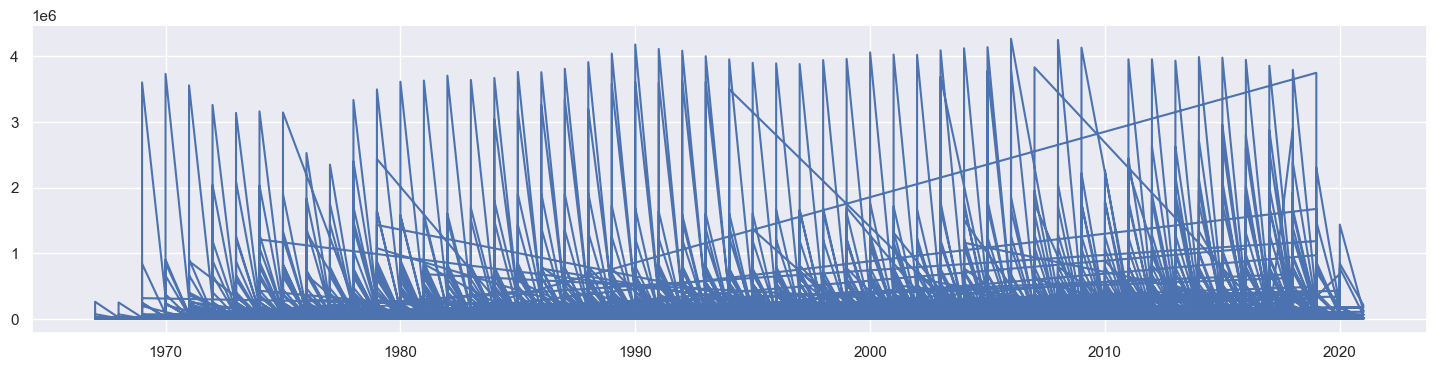

In [24]:
# s_df.Year.value_counts()
s_df[['Year','Number_of_Births']]
plt.plot(s_df['Year'],s_df['Number_of_Births'])

# Non-seasonal data

In [3]:
ns_df = pd.read_csv('price.csv',sep=',')

In [4]:
ns_df.shape

(13131, 81)

In [5]:
ns_df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212


<Axes: >

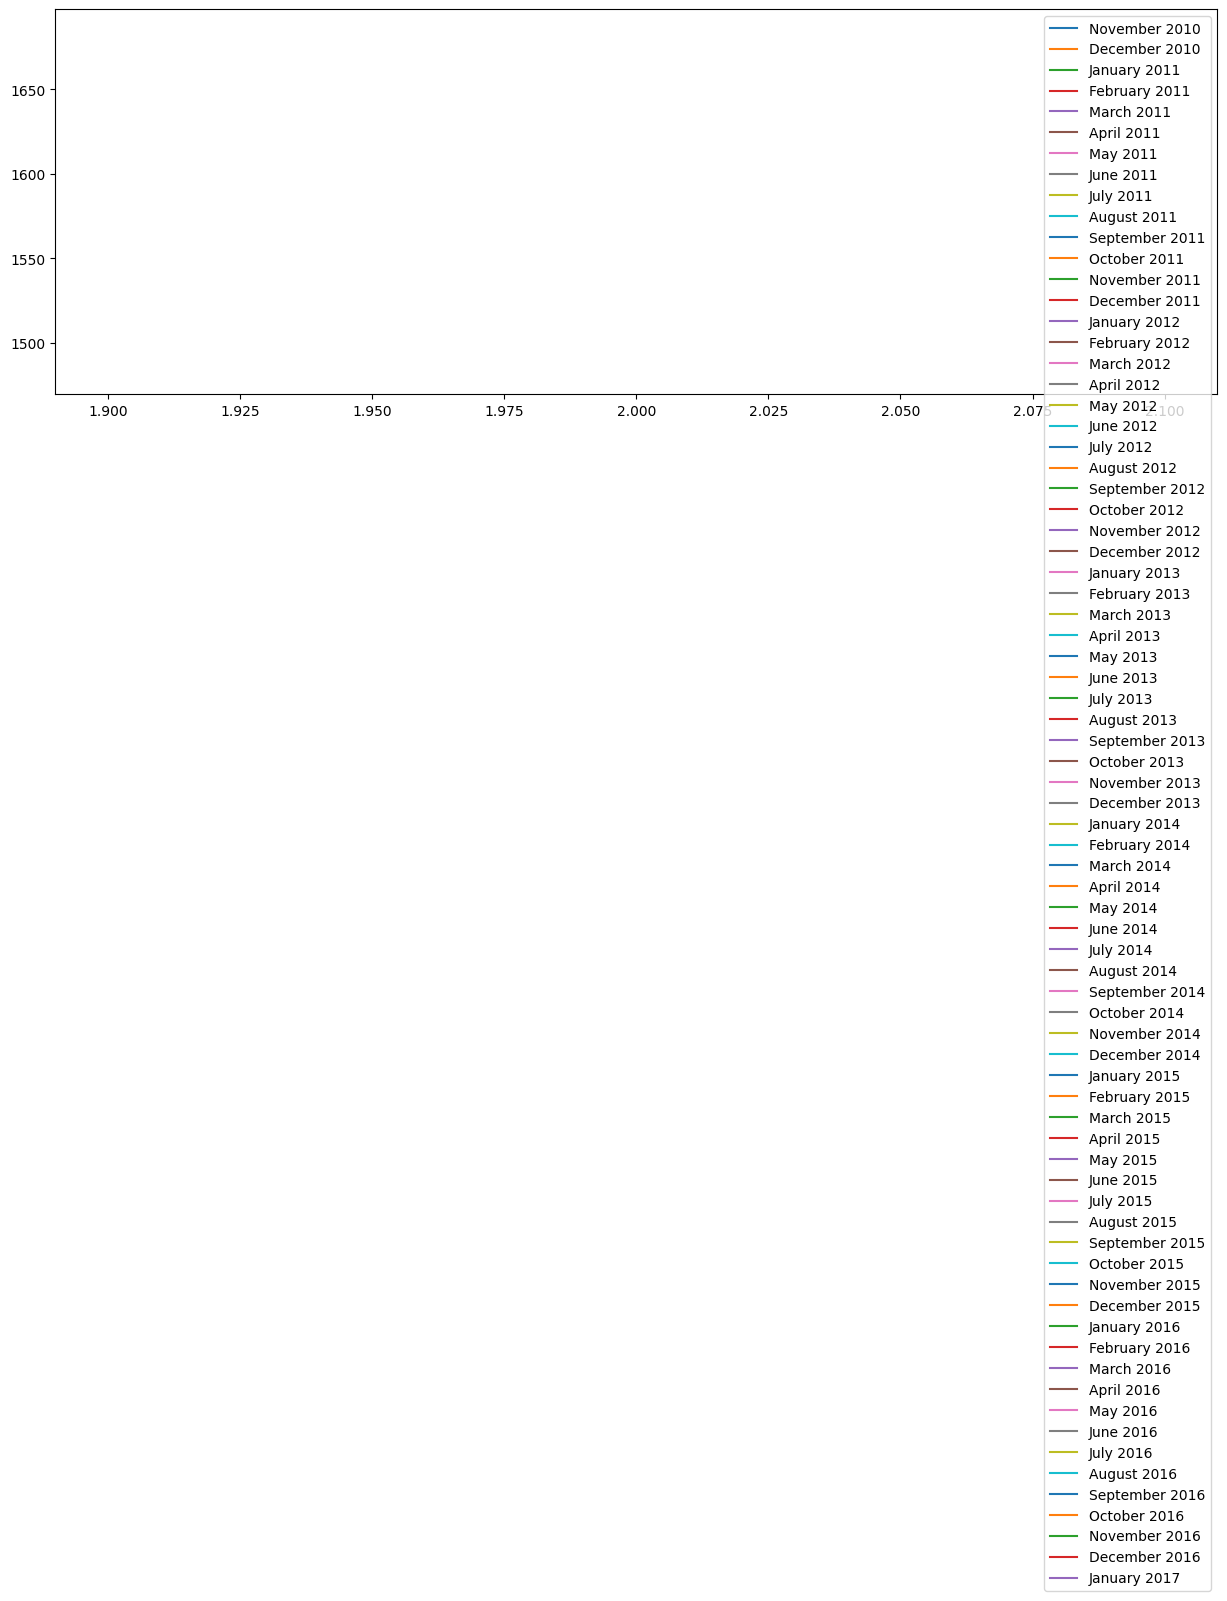

In [39]:
kwargs = {'kind':'line','figsize':(15,5)}

ns_df[ns_df.City.eq('Chicago')].iloc[:,6:].plot(**kwargs)

In [11]:
g_df.head()

,City Code,City,Metro,County,State,Population Rank,November 2010,December 2010,January 2011,February 2011,...,April 2016,May 2016,June 2016,July 2016,August 2016,September 2016,October 2016,November 2016,December 2016,January 2017
0,6181,New York,New York,Queens,NY,1,NaN,NaN,NaN,NaN,...,2334,2339,2345,2344,2336,2324,2318,2321,2321,2322
1,12447,Los Angeles,Los Angeles,Los Angeles,CA,2,2184.0,2184.0,2183.0,2188.0,...,2637,2662,2687,2704,2716,2723,2731,2740,2748,2753
2,17426,Chicago,Chicago,Cook,IL,3,1563.0,1555.0,1547.0,1537.0,...,1684,1686,1687,1685,1681,1675,1668,1656,1644,1632
3,39051,Houston,Houston,Harris,TX,4,1198.0,1199.0,1199.0,1200.0,...,1444,1446,1446,1443,1440,1438,1437,1437,1435,1430
4,13271,Philadelphia,Philadelphia,Philadelphia,PA,5,1092.0,1099.0,1094.0,1087.0,...,1206,1211,1218,1222,1223,1220,1216,1211,1209,1212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13126,397405,Highland Township,Gettysburg,Adams,PA,13127,1280.0,1280.0,1284.0,1284.0,...,1442,1440,1419,1409,1398,1395,1384,1368,1342,1321
13127,398292,Town of Wrightstown,Green Bay,Brown,WI,13128,639.0,650.0,668.0,694.0,...,1114,1133,1136,1124,1090,1047,1012,1004,1018,1047
13128,398343,Urbana,Corning,Steuben,NY,13129,1433.0,1431.0,1437.0,1458.0,...,1595,1611,1612,1607,1609,1619,1627,1625,1625,1624
13129,398839,Angels,NaN,Calaveras,CA,13130,1516.0,1529.0,1529.0,1515.0,...,1514,1528,1534,1525,1526,1529,1541,1553,1558,1563
